In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
%matplotlib inline

In [8]:
rc('font', family='Comic Sans MS')
zasilacz = pd.read_csv("Zasilacz.csv")
oscyloskop = pd.read_csv("Oscyloskop.csv")

In [13]:
for i in range(4):
    zasilacz.loc[i]["deltaU[V]"] = (zasilacz.loc[i]["U[V]"])*0.003+0.01
    zasilacz.loc[i,"deltaI[mA]"] = 30*0.01
zasilacz.loc[0,"deltaI[mA]"]= zasilacz.loc[3,"deltaI[mA]"]= 0
for i in range(4,7): 
    zasilacz.loc[i,"deltaI[mA]"] = zasilacz.loc[i,"I[mA]"]*0.012+0.1
zasilacz.loc[4,"deltaU[V]"] = 30*0.01
zasilacz.loc[5,"deltaU[V]"] = 10*0.01

In [12]:
zasilacz['opor[kom]'] = zasilacz['U[V]']/zasilacz['I[mA]']
zasilacz

,U[V],I[mA],deltaI[mA],deltaU[V],opor[om],opor[kom]
0,15.99,20.0,0.0000,NaN,0.799500,0.799500
1,15.97,19.0,0.3000,NaN,0.840526,0.840526
2,15.96,15.0,0.3000,NaN,1.064000,1.064000
3,15.95,0.0,0.0000,NaN,inf,inf
4,15.00,20.0,1.2400,0.3,0.750000,0.750000
5,7.40,20.2,1.2424,0.1,0.366337,0.366337
6,0.00,20.3,1.2436,NaN,0.000000,0.000000


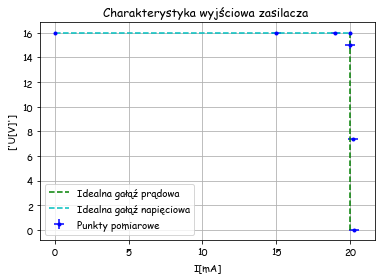

In [31]:
plt.errorbar(zasilacz["I[mA]"],zasilacz["U[V]"],zasilacz["deltaU[V]"],zasilacz["deltaI[mA]"],'.b',label='Punkty pomiarowe')
plt.title("Charakterystyka wyjściowa zasilacza ")
plt.xlabel("I[mA]")
plt.ylabel(["U[V]"])
plt.grid()
plt.plot([20,20],[0,15.99],'--g',label='Idealna gałąź prądowa')
plt.plot([0,20],[15.99,15.99],'--c',label='Idealna gałąź napięciowa')
plt.legend()
# plt.savefig("zasilacz.eps")
# plt.savefig("zasilacz.png")

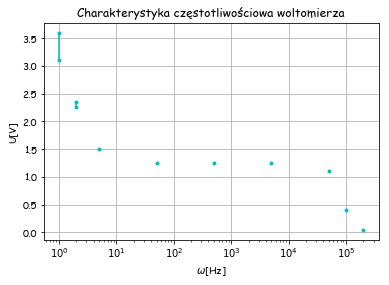

In [32]:
plt.plot(oscyloskop["omega[Hz]"],oscyloskop["U[V]"],'.c')
plt.xscale('log')
plt.title('Charakterystyka częstotliwościowa woltomierza')
plt.xlabel(r'$\omega$[Hz]')
plt.ylabel('U[V]')
plt.grid()
plt.plot(oscyloskop.loc[[0,1],"omega[Hz]"],oscyloskop.loc[[0,1],"U[V]"],'-c')
plt.plot(oscyloskop.loc[[2,3],"omega[Hz]"],oscyloskop.loc[[2,3],"U[V]"],'-c')
# plt.savefig('oscyloskop.eps')
# plt.savefig('oscyloskop.png')